In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv("D://WA_Fn-UseC_-HR-Employee-Attrition.csv")

print(data.head())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

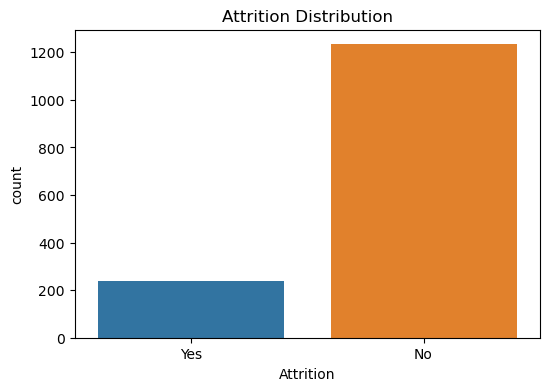

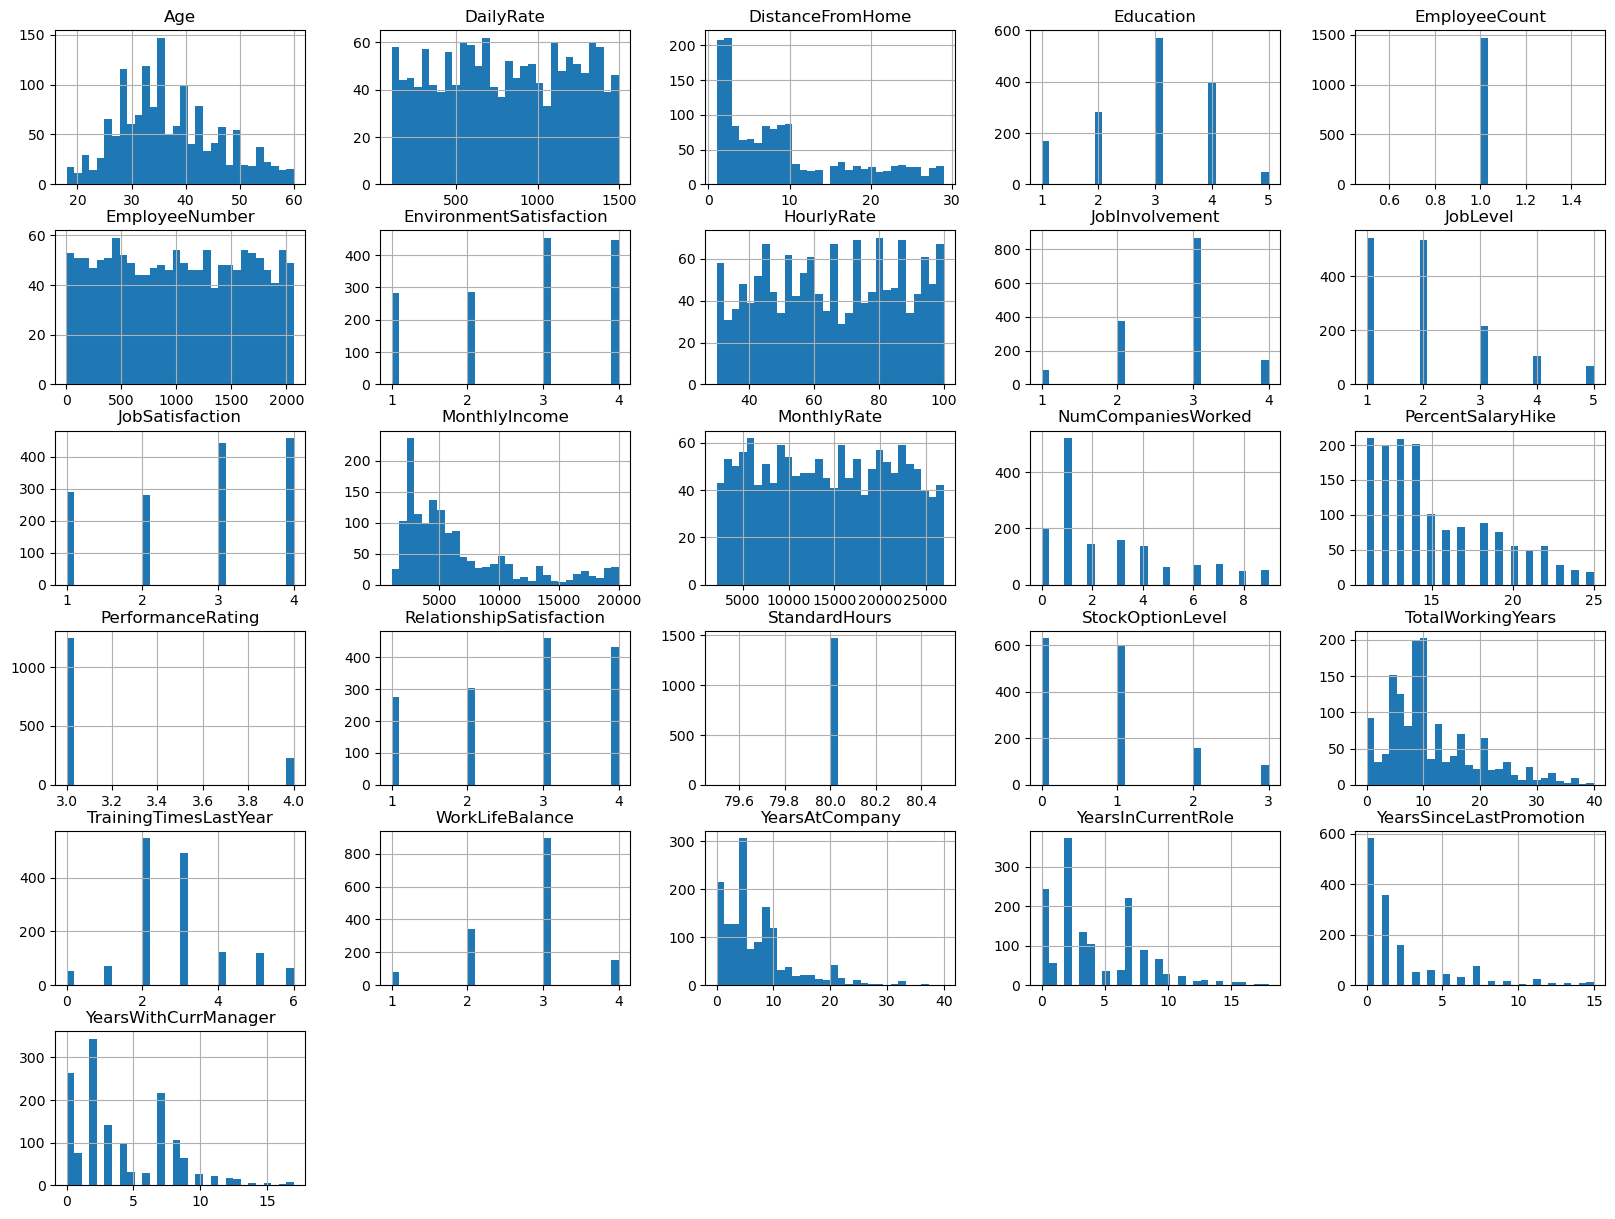

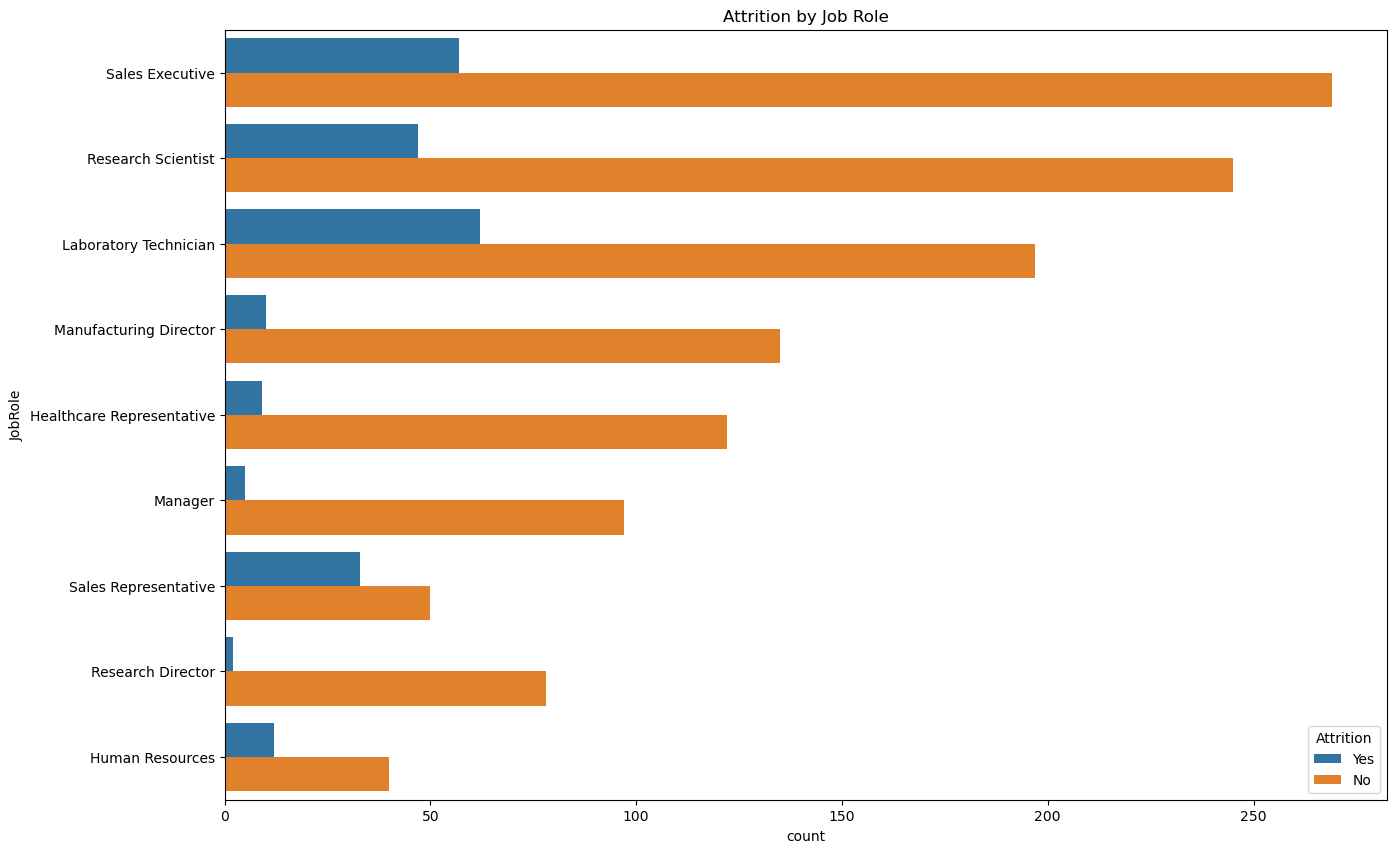

In [2]:
print(data.info())
print(data.describe())

print(data.isnull().sum())

plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition', data=data)
plt.title('Attrition Distribution')
plt.show()

data.hist(bins=30, figsize=(20, 15))
plt.show()

plt.figure(figsize=(15, 10))
sns.countplot(y='JobRole', hue='Attrition', data=data)
plt.title('Attrition by Job Role')
plt.show()


In [3]:
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

X = data.drop(columns=['Attrition'])
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [4]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

dt_class = DecisionTreeClassifier(random_state=42)
dt_class.fit(X_train, y_train)
dt_class_pred = dt_class.predict(X_test)

rf_class = RandomForestClassifier(random_state=42)
rf_class.fit(X_train, y_train)
rf_class_pred = rf_class.predict(X_test)

def evaluate_model(model, y_test, predictions):
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy_score(y_test, predictions)}")
    print(f"ROC AUC Score: {roc_auc_score(y_test, predictions)}")
    print("Classification Report:")
    print(classification_report(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))

print("Logistic Regression Evaluation:")
evaluate_model('Logistic Regression', y_test, log_reg_pred)

print("Decision Tree Classifier Evaluation:")
evaluate_model('Decision Tree Classifier', y_test, dt_class_pred)

print("Random Forest Classifier Evaluation:")
evaluate_model('Random Forest Classifier', y_test, rf_class_pred)


Logistic Regression Evaluation:
Model: Logistic Regression
Accuracy: 0.891156462585034
ROC AUC Score: 0.6549019607843136
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

Confusion Matrix:
[[249   6]
 [ 26  13]]
Decision Tree Classifier Evaluation:
Model: Decision Tree Classifier
Accuracy: 0.7653061224489796
ROC AUC Score: 0.5171945701357465
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       255
           1       0.16      0.18      0.17        39

    accuracy                           0.77       294
   macro avg       0.52      0.52      0.52       294
weighted avg       0.78      0.77      0.77       294

Confus

In [5]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=rf_class, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

best_rf_class = grid_search_rf.best_estimator_
best_rf_class_pred = best_rf_class.predict(X_test)
print("Tuned Random Forest Classifier Evaluation:")
evaluate_model('Tuned Random Forest Classifier', y_test, best_rf_class_pred)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Tuned Random Forest Classifier Evaluation:
Model: Tuned Random Forest Classifier
Accuracy: 0.8639455782312925
ROC AUC Score: 0.5414781297134238
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.44      0.10      0.17        39

    accuracy                           0.86       294
   macro avg       0.66      0.54      0.55       294
weighted avg       0.82      0.86      0.83       294

Confusion Matrix:
[[250   5]
 [ 35   4]]


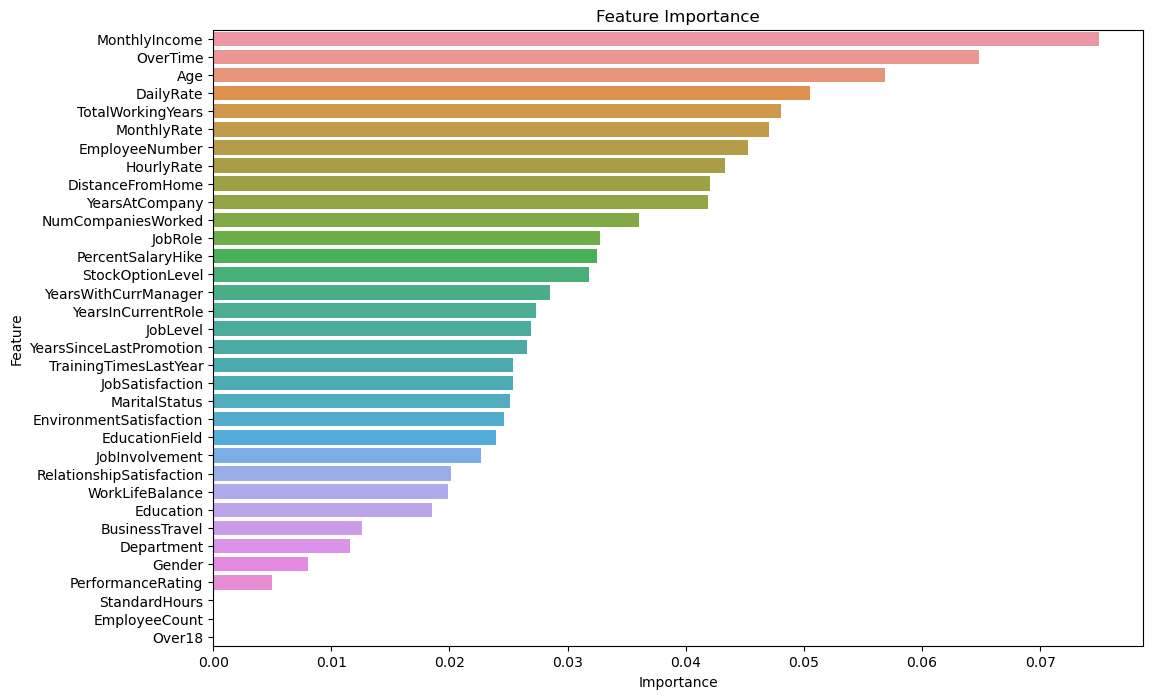

Top 10 important features for predicting attrition:
              Feature  Importance
17      MonthlyIncome    0.074968
21           OverTime    0.064823
0                 Age    0.056865
2           DailyRate    0.050505
27  TotalWorkingYears    0.048104
18        MonthlyRate    0.047090
8      EmployeeNumber    0.045296
11         HourlyRate    0.043352
4    DistanceFromHome    0.042012
30     YearsAtCompany    0.041914


In [6]:
importances = best_rf_class.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

top_features = feature_importance_df.head(10)
print("Top 10 important features for predicting attrition:")
print(top_features)


In [ ]:
# HR Analytics Project: Understanding Attrition

## Introduction
This project aims to analyze employee attrition and develop a model to predict whether an employee will leave the company. The dataset contains information on various factors related to employee performance and demographics.

## Data Overview
- **Number of samples**: X (replace with actual number)
- **Number of features**: 35 (replace with actual number)
- **Target Variable**: Attrition (Yes/No)

## Methodology

### 1. Data Import and Libraries
- Imported necessary libraries and loaded the dataset.

### 2. Exploratory Data Analysis (EDA)
- Conducted an overview of the data.
- Visualized distributions and relationships between features and target variables.

### 3. Data Preprocessing and Feature Engineering
- Encoded categorical variables.
- Standardized features.
- Split data into training and testing sets.

### 4. Model Building and Evaluation
- Models used: Logistic Regression, Decision Tree Classifier, Random Forest Classifier
- Evaluation metrics: Accuracy, ROC AUC Score, Classification report, Confusion matrix

### 5. Hyperparameter Tuning
- Performed hyperparameter tuning for the Random Forest Classifier.
- Selected the best model based on evaluation metrics.

### 6. Model Interpretation and Insights
- Analyzed feature importance from the best Random Forest model.
- Identified top 10 important features for predicting attrition.

## Findings

- **Best performing model**: Tuned Random Forest Classifier
  - **Accuracy**: X ( 0.8639455782312925)
  - **ROC AUC Score**: Y (0.5414781297134238)
  - **Top 10 important features**: (  Feature  Importance
17      MonthlyIncome    0.074968
21           OverTime    0.064823
0                 Age    0.056865
2           DailyRate    0.050505
27  TotalWorkingYears    0.048104
18        MonthlyRate    0.047090
8      EmployeeNumber    0.045296
11         HourlyRate    0.043352
4    DistanceFromHome    0.042012
30     YearsAtCompany    0.041914
# HR Analytics Project: Understandin)

## Conclusion
The Tuned Random Forest Classifier provided the best performance for predicting employee attrition. The feature importance analysis revealed key factors contributing to attrition, which can be used by HR to develop strategies to retain employees.

## Future Work
Further improvements can be made by exploring additional features, experimenting with other machine learning algorithms, and fine-tuning the hyperparameters more extensively.
